# Исследование продаж в онлайн-магазине 

### Цель данного исследования: 
Определить взаимосвязь и влияние Пола и Возраста на количество и суммы покупок. 

## Задачи:

1) Загрузите данные из файла csv, прикрепленному к заданию. 

2) Замерьте время отработки ячейки импорта данных 

3) Опишите ваши данные (Строки и колонки) 

4) Посчитайте количество покупателей по полам и визуализируйте ваши подсчеты на круговой диаграмме (Pie Chart) 

5) Опишите ваши выводы из построенной диаграммы 

6) Постройте график, который будет отображать количество покупателей по возрастам и покажет частоту встречающихся значений. 

7) Опишите ваши выводы из построенного графика 

8) Постройте график сумм продаж по датам, чтобы показать динамику выручки по месяцам. 

9) Опишите ваши выводы 

10) Постройте график по количествам продаж, сгруппированных по полам. То есть одна шкала продажи по мужчинам, вторая по женщинам. Данный график должен показывать динамику количества продаж по полам, в течении определенного периода.+

11) Проверьте следующие гипотезы: 

- H1 - Возраст стат. значимо влияет на количество продаж

- H0 - Возраст стат. значимо не влияет на количество продаж

Гипотеза 2: 

- H1 - Пол стат. значимо влияет на количество продаж

- H0 - Пол стат. значимо не влияет на количество продаж

12) Опишите почему вы выбрали определенный тип теста (Стьюдента, Манна Уитни итд.) для проверки гипотез. 

13) Напишите финальный вывод, с вашим заключением из проверенных гипотез.

In [1]:
#загружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('electronics_sales_dataset.csv')

### Замерить время отработки ячейки импорта данных

In [3]:
%time
df

CPU times: total: 0 ns
Wall time: 0 ns


,client_id,age,gender,product,product_category,purchased_quantity,price,purchase_date
0,1,50,Female,games,games,10,47,2023-02-02
1,2,31,Male,TV,TV,2,1083,2023-07-08
2,3,33,Male,laptop,laptop,5,1436,2023-06-06
3,4,39,Male,smart-watches,smart-watches,9,80,2022-11-22
4,5,49,Female,laptop,laptop,1,1030,2023-05-04
...,...,...,...,...,...,...,...,...
499995,499996,50,Female,case,case,8,10,2023-07-01
499996,499997,42,Male,TV,TV,1,2976,2023-01-21
499997,499998,37,Female,TV,TV,3,3143,2024-02-16
499998,499999,50,Male,smartphone,smartphone,10,749,2024-01-02


In [4]:
%time
df.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   client_id           500000 non-null  int64 
 1   age                 500000 non-null  int64 
 2   gender              500000 non-null  object
 3   product             500000 non-null  object
 4   product_category    500000 non-null  object
 5   purchased_quantity  500000 non-null  int64 
 6   price               500000 non-null  int64 
 7   purchase_date       500000 non-null  object
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


In [5]:
#поменять тип данных на дату
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

### Описание данных
1. client_id: уникальный идентификатор клиента или пользователя в наборе данных
2. age: возраст            
3. gender: пол (male and female)             
4. product: товары в интернет магазине (TV, case, games, laptop, smart-watches, smartphone)
5. product_category: Категорий товаров в интернет магазине  (TV, case, games, laptop, smart-watches, smartphone)
6. purchased_quantity: количество приобретенных товаров
7. pricе: цена
8. purchase_date:  дата, когда был совершен определенная покупка или транзакция

In [6]:
df.groupby('product').agg({'client_id':'nunique'}).reset_index()

,product,client_id
0,TV,83207
1,case,83315
2,games,83128
3,laptop,83398
4,smart-watches,83330
5,smartphone,83622


In [7]:
df.groupby('product_category').agg({'client_id':'nunique'}).reset_index()

,product_category,client_id
0,TV,83207
1,case,83315
2,games,83128
3,laptop,83398
4,smart-watches,83330
5,smartphone,83622


### Посчитать количество покупателей по полам и визуализировать на круговой диаграмме (Pie Chart)


In [8]:
df.groupby('gender').agg({'client_id':'nunique'}).reset_index()

,gender,client_id
0,Female,249815
1,Male,250185


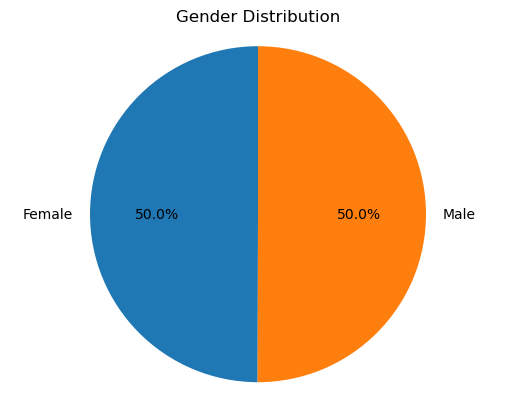

In [9]:
# Круговая диаграмма показывает количество покупателей по полам
genders = ['Female', 'Male']
client_counts = [249815, 250185]

# Построение пай-чарта
plt.pie(client_counts, labels=genders, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

### Вывод
-  Распределение покупателей между мужчинами и женщинами приблизительно равномерное. Это говорит о том, что данный бизнес привлекает внимание и интерес как у женской, так и у мужской аудитории в равной степени.

### Построить график, который будет отображать количество покупателей по возрастам и покажет частоту встречающихся значений.


In [10]:
df_1 = df.groupby('age').agg({'client_id':'nunique'}).reset_index().sort_values(by = 'age')

C:\Users\kanat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


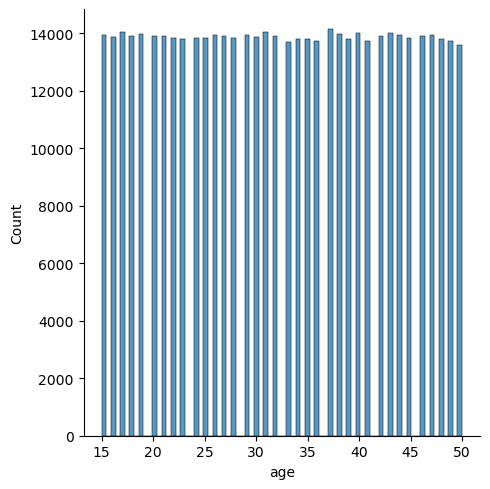

In [11]:
# График через сиборн показывает количество покупателей по возрастам
sns.displot(df['age'])

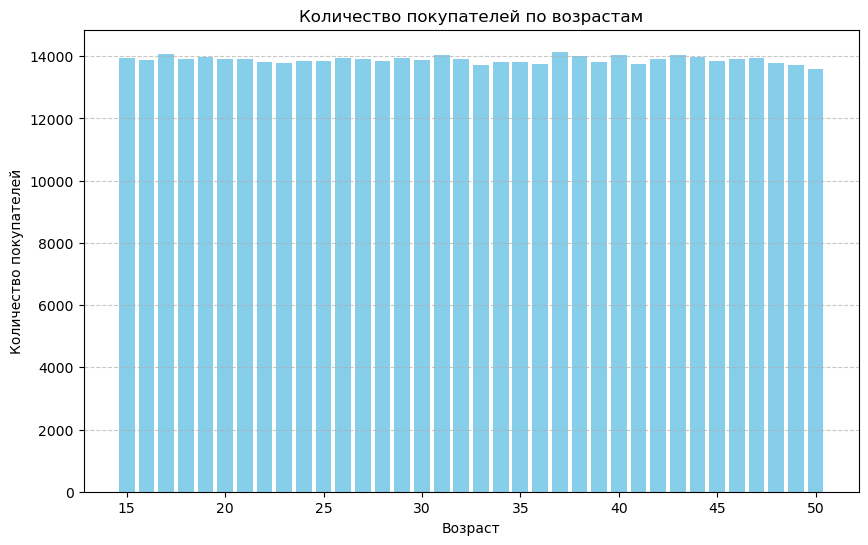

In [12]:
# Столбчатая диаграмма показывает количество покупателей по возрастам

age_counts = df['age'].value_counts().sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.title('Количество покупателей по возрастам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

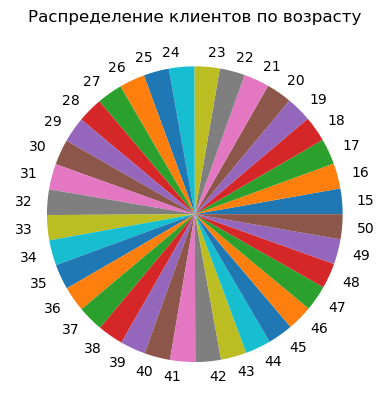

In [13]:
#То же самое можно визуализировать через круговую диаграмму
y = df_1['client_id']
mylabels = df_1['age']
plt.title('Распределение клиентов по возрасту')

plt.pie(y, labels = mylabels)
plt.show

### Вывод
- Товары продаваемые в интернет-магазине популярны среди клиентов в возрасте от 15 до 50 лет. 
- Распределение клиентов примерно одинаково в разных возрастных группах и нет явного тренда, то можно предположить, что компания привлекает клиентов из разных возрастных категорий в равной степени. 
- Электроника часто является востребованной категорией среди различных возрастных групп.

### Построить график сумм продаж по датам, чтобы показать динамику выручки по месяцам. 


In [14]:
monthly_grouped = df.groupby(df['purchase_date'].dt.to_period("M")).agg({'price': 'sum'}).reset_index()
monthly_grouped

,purchase_date,price
0,2022-11,24664862
1,2022-12,25289225
2,2023-01,25356059
3,2023-02,22579621
4,2023-03,25596738
5,2023-04,24653879
6,2023-05,25484412
7,2023-06,24453327
8,2023-07,25693126
9,2023-08,25903911


In [15]:
monthly_grouped_1 = df.groupby(df['purchase_date'].dt.to_period("M")).agg({'price': 'sum', 'client_id':'nunique'}).reset_index()

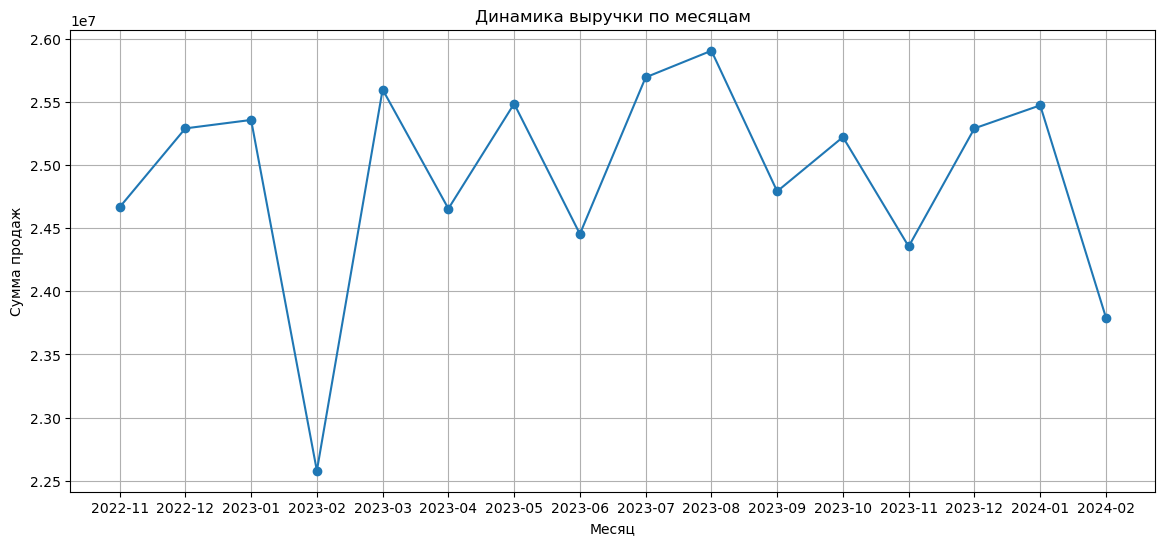

In [16]:
# Динамика выручки по месяцам
import matplotlib.pyplot as plt

# Группировка данных по месяцам с использованием названия месяца и расчет суммы цен
monthly_grouped = df.groupby(df['purchase_date'].dt.to_period("M")).agg({'price': 'sum'}).reset_index()
monthly_grouped.columns = ['purchase_month', 'total_price']

# Построение графика
plt.figure(figsize=(14, 6))
plt.plot(monthly_grouped['purchase_month'].astype(str), monthly_grouped['total_price'], marker='o')
plt.title('Динамика выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.grid(True)
plt.show()


### Bывод
- На этом графике можно увидеть в какие месяцы бывают пик продаж , а в какие спад
- Существует некоторая сезонность или вариативность в продажах электроник
- Пики продаж в июле-августе могут объяснять, что многие готовяться к началу нового учебного года и покупают электронику в этот промежуток времени
- Пики продаж в декабре-январе могут быть связаны с сезонными покупками, связанными с праздниками и подарками на Новый Год
- Спад в феврале может быть связан с тем, что многие покупатели завершают свои покупки в декабре и январе в период распродаж (затишье после праздников)
- Спад в ноябре может быть связан с ожиданием распродаж в период "Черной пятницы" и "Киберпонедельника".

###  График по количествам продаж, сгруппированных по полам. То есть одна шкала продажи по мужчинам, вторая по женщинам. Данный график должен показывать динамику количества продаж по полам, в течении определенного периода.

In [17]:
# Количество продажи за все время
df_purch = df.groupby('gender').agg({'purchased_quantity':'sum'}).reset_index() 
df_purch

,gender,purchased_quantity
0,Female,1232391
1,Male,1227098


In [18]:
#Делаем фильтрацию, чтобы удобнее было считать
filtered_male_data = df[df['gender'] == 'Male']
filtered_female_data = df[df['gender'] == 'Female']

In [19]:
# Количество продажи группированная по месяцам (мужчины) 
filtered_male_grouped= filtered_male_data.groupby(df['purchase_date'].dt.to_period("M")).agg({'purchased_quantity': 'sum'}).reset_index()

In [20]:
# Количество продажи группированная по месяцам (женщины)  
filtered_female_grouped= filtered_female_data.groupby(df['purchase_date'].dt.to_period("M")).agg({'purchased_quantity': 'sum'}).reset_index()

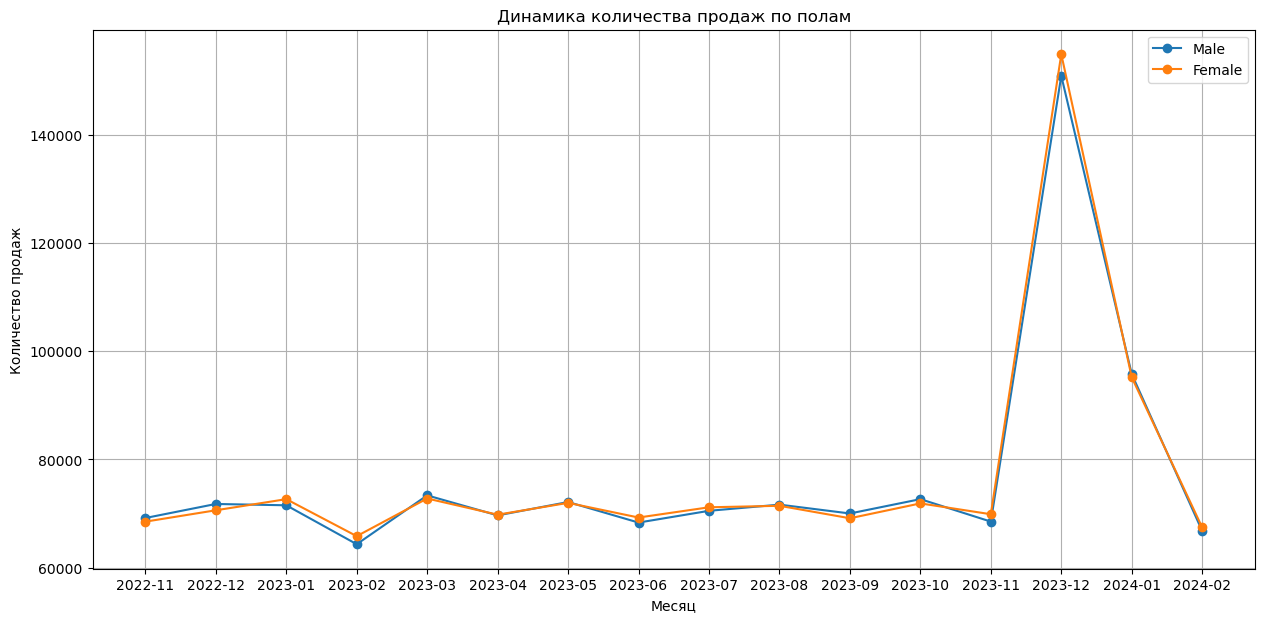

In [21]:
#Динамика количества продаж по полам за весь период
import matplotlib.pyplot as plt

filtered_male_grouped.columns = ['purchase_month', 'total_purchased_quantity']
filtered_female_grouped.columns = ['purchase_month', 'total_purchased_quantity']


# Построение графика
plt.figure(figsize=(15, 7))
plt.plot(filtered_male_grouped['purchase_month'].astype(str), filtered_male_grouped['total_purchased_quantity'], marker='o', label='Male')
plt.plot(filtered_female_grouped['purchase_month'].astype(str), filtered_female_grouped['total_purchased_quantity'], marker='o', label='Female')
plt.legend()

plt.title('Динамика количества продаж по полам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

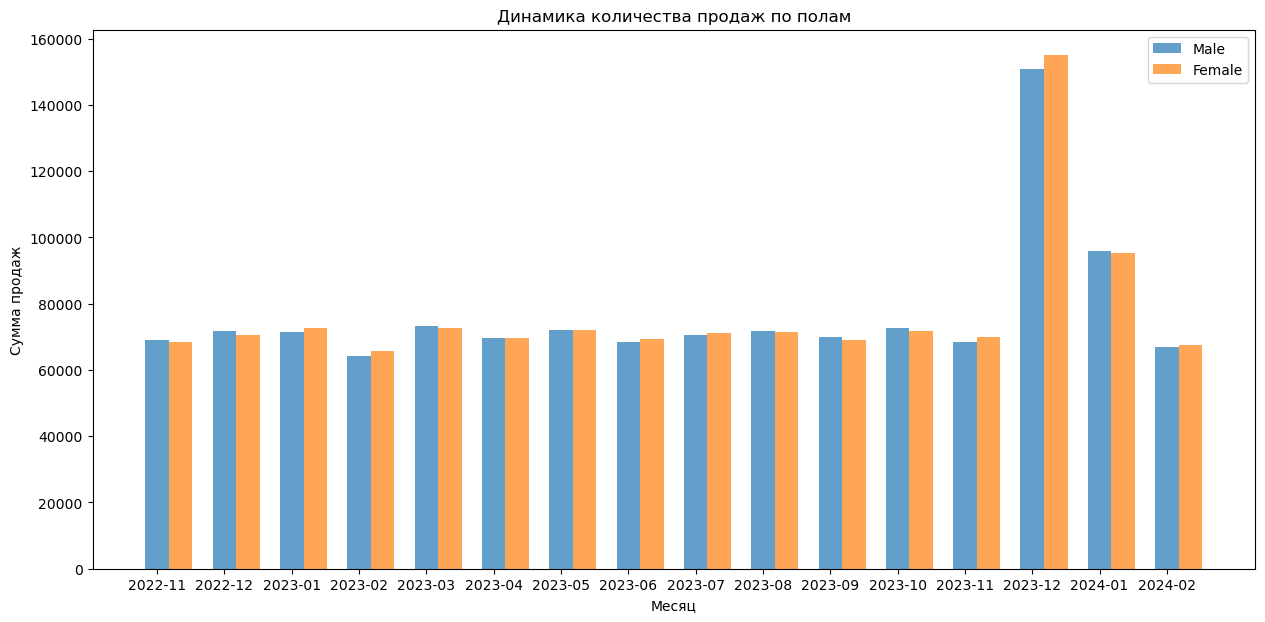

In [22]:
# Построение графика с барными столбцами
plt.figure(figsize=(15, 7))

bar_width = 0.35
bar_positions_male = range(len(filtered_male_grouped))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]

plt.bar(bar_positions_male, filtered_male_grouped['total_purchased_quantity'], width=bar_width, label='Male', alpha=0.7)
plt.bar(bar_positions_female, filtered_female_grouped['total_purchased_quantity'], width=bar_width, label='Female', alpha=0.7)

plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.title('Динамика количества продаж по полам')
plt.xticks(bar_positions_male, filtered_male_grouped['purchase_month'].astype(str))

plt.legend()
plt.show()

### Вывод
- Как для мужчин, так и для женщин наблюдается пик покупок в декабре 2023 года и январе 2024 года.
- Паттерны кажутся относительно схожими с колебаниями в других месяцах.

### Проверка гипотез


### Гипотеза 1:
    
- H1 - Возраст стат. значимо влияет на количество продаж

- H0 - Возраст стат. значимо не влияет на количество продаж 

In [23]:
df_age_p = df.groupby('age').agg({'purchased_quantity':'sum'}).reset_index().sort_values(by = 'purchased_quantity')

In [24]:
df_age_p

,age,purchased_quantity
21,36,67028
7,22,67360
34,49,67529
10,25,67581
13,28,67600
35,50,67620
12,27,67712
26,41,67781
18,33,67835
27,42,67836


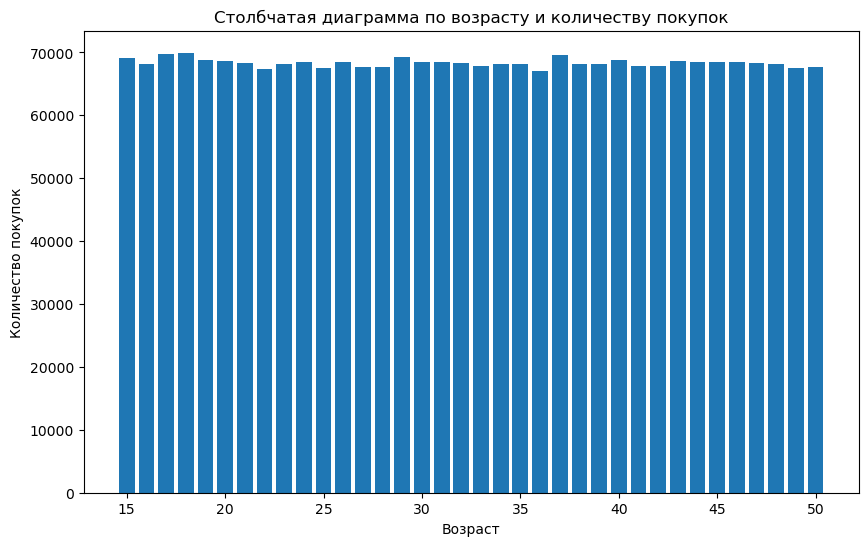

In [25]:
#Столбчатая диаграмма по возрасту и количеству покупок
plt.figure(figsize=(10, 6))
plt.bar(df_age_p['age'], df_age_p['purchased_quantity'])
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.title('Столбчатая диаграмма по возрасту и количеству покупок')
plt.show()


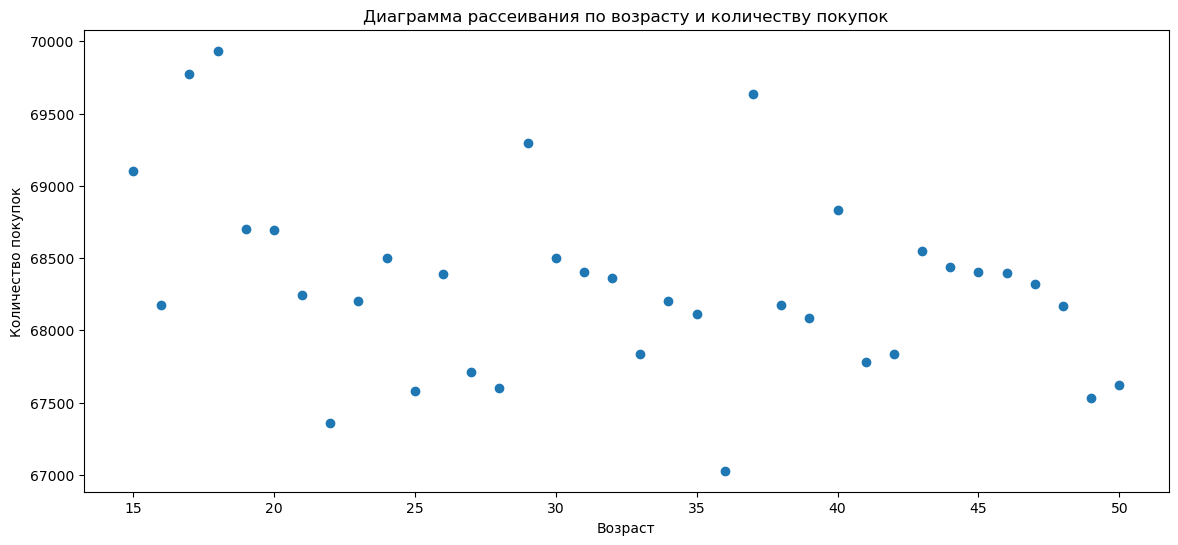

In [26]:
# Диаграмма рассеивания по возрасту и количеству покупок
import matplotlib.pyplot as plt


# Создание диаграммы рассеивания
plt.figure(figsize=(14, 6))
plt.scatter(df_age_p['age'], df_age_p['purchased_quantity'])
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.title('Диаграмма рассеивания по возрасту и количеству покупок')
plt.show()
# через эту диаграмму можно увидеть, что данные распределены не нормально, 
# следовательно мы не можем использовать корреляцию Пирсона
#правильнее использовать корреляцию Спирмена

In [27]:
# Расчет коэффициента корреляции Спирмена

from scipy.stats import spearmanr
corr_coeff_spearman, p_value_spearman = spearmanr(df['age'], df['purchased_quantity'])

# Вывод результатов
print(f'Коэффициент корреляции Спирмена: {corr_coeff_spearman}')
print(f'p-value Спирмена: {p_value_spearman}')

# Проверка статистической значимости
alpha = 0.05
if p_value_spearman < alpha:
    print('Отклоняем нулевую гипотезу. Возраст статистически значимо влияет на количество продаж (по корреляции Спирмена).')
else:
    print('Не отклоняем нулевую гипотезу. Нет статистически значимого влияния возраста на количество продаж (по корреляции Спирмена).')


Коэффициент корреляции Спирмена: -0.0008603850159665549
p-value Спирмена: 0.5429337020761191
Не отклоняем нулевую гипотезу. Нет статистически значимого влияния возраста на количество продаж (по корреляции Спирмена).


##### Вывод: Не отклоняем нулевую гипотезу. Нет статистически значимого влияния возраста на количество продаж.

### Гипотеза 2:

- H1 - Пол стат. значимо влияет на количество продаж

- H0 - Пол стат. значимо не влияет на количество продаж

In [28]:
# Количество продажи за все время
df_purch = df.groupby('gender').agg({'purchased_quantity':'sum'}).reset_index() 
df_purch

,gender,purchased_quantity
0,Female,1232391
1,Male,1227098


#### Тест Манна-Уитни

In [29]:
from scipy.stats import mannwhitneyu

In [30]:
mannwhitneyu(df.query('gender == "Male"')['purchased_quantity'], df.query('gender == "Female"')['purchased_quantity'])
# Использовала данный тест, так как распределение не нормальное 

MannwhitneyuResult(statistic=31141328019.5, pvalue=0.03186719147544529)

##### Вывод: Отклоняем нулевую гипотезу. Пол стат. значимо влияет на количество продаж, так как pvalue=0.0318

### Опишите почему вы выбрали определенный тип теста для проверки гипотез.
1. Гипотеза 1: Корреляционный анализ Спирмена
- Диаграмма рассеивания показала, что данные распределены не нормально, следовательно мы не можем использовать корреляцию Пирсона. Правильнее использовать корреляцию Спирмена
- Коэффициент близок к нулю, что указывает на отсутствие явной монотонной связи между возрастом и количеством покупок.

2. Гипотеза 2: Тест Манна-Уитни

Я указала причины, почему я использовала Тест Манна-Уитни
- Ненормальное распределение данных
- Независимые выборки: Тест Манна-Уитни применим для сравнения двух независимых выборок, что делает его подходящим для анализа  данных по мужчинам и женщинам
- Не чувствителен к выбросам

### Финальный вывод


- Распределение покупателей между мужчинами и женщинами приблизительно равномерное. Это говорит о том, что данный бизнес привлекает внимание и интерес как у женской, так и у мужской аудитории в равной степени. (Female-249815, Male-250185)
- Интернет магазин привлекает клиентов из разных возрастных категорий в равной степени от 15 до 50 лет.
- Существует некоторая сезонность или вариативность в продажах электроник. Пики продаж в июле-августе могут объяснять, что многие готовяться к началу нового учебного года и покупают электронику в этот промежуток времени. Пики продаж в декабре-январе могут быть связаны с сезонными покупками, связанными с праздниками и подарками на Новый Год. Спад в феврале может быть связан с тем, что многие покупатели завершают свои покупки в декабре и январе в период распродаж (затишье после праздников). Спад в ноябре может быть связан с ожиданием распродаж в период "Черной пятницы" и "Киберпонедельника".
1. Гипотеза 1
- Исходя из коэффициента корреляции Спирмена и p-value, мы можем сделать следующие выводы: 
- Коэффициент близок к нулю, что указывает на отсутствие явной монотонной связи между возрастом и количеством покупок.
- P-value 0.542 значительно превышает уровень значимости 0.05, что означает, что нет статистически значимого влияния возраста на количество продаж.
- На основе проведенного анализа, у нас нет достаточных оснований для отклонения нулевой гипотезы, что возраст не оказывает статистически значимого влияния на количество продаж.

2. Гипотеза 2
- Результаты теста Манна-Уитни указывают на то, что у вас есть статистически значимые различия между группами мужчин и женщин в отношении количества продаж. P-значение равно 0.0319, что меньше обычного уровня значимости 0.05. Таким образом, мы можем отвергнуть нулевую гипотезу, которая утверждает, что пол не влияет на количество продаж. Результаты говорят о том, что пол имеет статистически значимое влияние на количество продаж в вашем наборе данных.